<a href="https://colab.research.google.com/github/t1seo/AIFFEL/blob/master/FUNDAMENTALS/09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9. 다양한 데이터 전처리 기법

- [관세청 수출입 무역 통계]()

## 9-1. 들어가며

데이터 분석의 8할은 데이터 전처리이다.

In [ ]:
from google.colab import files
file_upload = files.upload()

In [ ]:
trade_data = "trade.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

trade = pd.read_csv(trade_data)
trade.head()

## 9-2. 결측치(Missing Data)
결측치를 처리하는 방법은 크게 두 가지가 있습니다.

1. 결측치가 있는 데이터를 제거한다.
2. 결측치를 어떤 값으로 대체한다.


결측치를 대체하는 방법은 다양한데 데이터마다 특성을 반영하여 해결해야 합니다.

In [ ]:
# 전체 데이터 건수 확인
print('전체 데이터 건수: ', len(trade))

In [ ]:
# 전체 데이터 건수 - 각 컬럼별 값에 있는 데이터 수 -> 컬럼별 결측치의 개수
print("컬럼별 결측치 개수")
len(trade) - trade.count()

In [ ]:
trade.info()

- `기타사항`은 전부 결측치이다. 이 컬럼은 삭제해준다.

In [ ]:
# 기타사항 컬럼 삭제
trade = trade.drop('기타사항', axis=1)
trade.head()

- `DataFrame.isnull()`은 데이터마다 결측치 여부를 True, False로 반환합니다.
- `DataFrame.any(axis=1)`는 행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반환합니다.

In [ ]:
# isnull(): 데이터마다 결측치 여부 확인
trade.isnull()

In [ ]:
# isnull + any: 각 행에 결측치 하나라라도 있는지 
trade.isnull().any(axis=1)

In [ ]:
# True인 데이터만 추출
trade[trade.isnull().any(axis=1)]

- `trade.isnull().any(axis=1)`을 다시 DataFrame에 넣어주면 값이 True인 데이터만 추출해줍니다.

- index 191은 수출금액, 무역수지 2개의 컬럼이 빠졌다. 이 결측치는 특정값으로 대체해주는 것이 좋다.
- index 191, 197, 198은 국가명을 제외하고 모두 결측치다. 이 row들은 제거해주는 것이 바람직하다.

'수출건수', '수출금액', '수입건수', '수입금액', '무역수지' 열이 모두 결측치인 index 196, 197, 198을 삭제

- DataFrame의 `dropna`는 결측치를 삭제해주는 메서드입니다.
- `subset` 옵션으로 특정 컬럼들을 선택했습니다.
- `how` 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로 'all'을 선택합니다. ('any': 하나라도 결측치인 경우)
- `inplace` 옵션으로 해당 DataFrame 내부에 바로 적용시켰습니다.

In [ ]:
# index 196 ~ 198 삭제
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
trade_copy = trade
# 다시 데이터 확인
trade[trade.isnull().any(axis=1)]

index 191과 같이 수치형 데이터를 보완할 방법은 많습니다.

1. **특정 값을 지정해줄 수 있습니다.** 그러나 결측치가 많은 경우, 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아지는 문제가 생길 수 있습니다.

2. **평균, 중앙값 등으로 대체할 수 있습니다.** 1번에서 특정 값으로 대체했을 때와 마찬가지로 결측치가 많은 경우 데이터의 분산이 실제보다 작아지는 문제가 발생할 수 있습니다.

3. **다른 데이터를 이용해 예측값으로 대체할 수 있습니다.** 예를 들어 머신러닝 모델로 2020년 4월 미국의 예측값을 만들고, 이 값으로 결측치를 보완할 수 있습니다.

4. **시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다.** 예를 들어 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있습니다.

index 191은 4번 방법을 통해 보완하도록 하겠습니다.

`DataFrame.loc[행 라벨, 열 라벨]`을 입력하면 해당 라벨을 가진 데이터를 출력해줍니다.

In [ ]:
trade.loc[[188, 191, 194]]

In [ ]:
# index 191의 수출금액 컬럼값을 이전 달과 다음 달의 평균으로 채우도록 합니다.
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액']) / 2
trade.loc[[191]]

In [ ]:
# index 191의 무역수지 컬럼은 수출금액과 수입금액의 차이를 이용하여 채우도록 하겠습니다.
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액']
trade.loc[[191]]

데이터가 범주형인 경우는 어떻게 해야 할까요? 이는 수치형일 때와 유사합니다.

1. **특정 값을 지정해줄 수 있습니다.** 예를 들어 ‘기타’, ‘결측’과 같이 새로운 범주를 만들어 결측치를 채울 수 있습니다.

2. **최빈값 등으로 대체한다.** 결측치가 많은 경우 최빈값이 지나치게 많아질 수 있으므로 결측치가 많을 때는 다른 방법을 사용한다.

3. **다른 데이터를 이용해 예측값으로 대체할 수 있다.**

4. **시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다.** 예를 들어 특정인의 2019년 직업이 결측치이고, 2018년과 2020년 직업이 일치한다면 그 값으로 보완할 수 있습니다. 만약 다르다면 둘 중 하나로 보완하도록 합니다.

## 9-3. 중복된 데이터

데이터를 수집하는 과정에서 중복된 데이터가 생길 수 있습니다. 

같은 값을 가진 데이터 없이 행(row)별로 값이 유일해야 한다면 중복된 데이터를 제거해야 합니다.



- `DataFrame.duplicated()`는 중복된 데이터 여부를 불리언 값으로 반환해줍니다.

In [ ]:
# 데이터 중복 여부 확인
trade.duplicated()

In [ ]:
trade[trade.duplicated()]

In [ ]:
trade[(trade['기간']=='2020년 03월') & (trade['국가명']=='중국')]

- index 186, 187이 중복되었다.

pandas에서는 `DataFrame.drop_duplicates`를 통해 중복된 데이터를 손쉽게 삭제할 수 있습니다.
- [pandas.DataFrame.drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas-dataframe-drop-duplicates)

In [ ]:
# 중복 데이터 제거
trade.drop_duplicates(inplace=True)

# 데이터 다시 확인
trade[(trade['기간']=='2020년 03월') & (trade['국가명']=='중국')]

In [ ]:
# 예제 데이터
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

- 예제 데이터에서 id가 중복되었다. id가 중복된 경우 맨 나중에 들어온 값만 남겨야 한다.

In [ ]:
df.drop_duplicates(subset=['id'], keep='last')

## 9-4. 이상치(Outlier)

이상치란 대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값을 의미합니다.

Min-Max Scaling 해보면 대부분의 값은 0에 가깝고 이상치만 1에 가까운 값을 가지게 될 것입니다. 

이렇게 몇 개의 이상치 때문에 대부분 값의 차이는 의미가 거의 없어지게 됩니다.

극단적인 값이 생기는 경우를 제외하고 데이터를 고려하고 싶은 경우 이상치를 제거하고 분석합니다.

---

현실에서 이상치를 찾는 것(anomaly detection) 자체가 큰 분야입니다.

가장 먼저 생각해 볼 수 있는 간단하고 자주 사용되는 방법은 평균과 표준편차를 이용하는 `z score` 방법입니다.

평균을 빼주고 표준편차로 나눠 z score$({\frac {X-\mu }{\sigma }})$
​를 계산합니다. 그리고 z score가 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단합니다. 

기준을 작게 하면 이상치라고 판단하는 데이터가 많아지고, 기준을 크게 하면 이상치라고 판단하는 데이터가 적어집니다.

---

이상치를 판단한 뒤 어떻게 해야 할까요?

1. **가장 간단한 방법으로 이상치를 삭제할 수 있습니다.** 이상치를 원래 데이터에서 삭제하고, 이상치끼리 따로 분석하는 방안도 있습니다.

2. **이상치를 다른 값으로 대체할 수 있습니다.** 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있습니다. 예를 들어 최댓값, 최솟값을 설정해 데이터의 범위를 제한할 수 있습니다.

3. 혹은 결측치와 마찬가지로 **다른 데이터를 활용하여 예측 모델을 만들어 예측값을 활용**할 수도 있습니다.

4. 아니면 **binning을 통해 수치형 데이터를 범주형**으로 바꿀 수도 있습니다.


### z-score method

- [표준 점수 z-score](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%EC%A0%90%EC%88%98)

$$({\frac {X-\mu }{\sigma }})$$

- 여기서 x는 정상화되는 원수치이다.
- μ는 모집단에서의 평균이다.
- σ는 모집단에서의 표준편차이다.


이상치인 데이터의 인덱스를 리턴하는 `outlier`라는 함수를 만들었습니다.

데이터프레임 `df`, 컬럼 `col`, 기준 `z`를 인풋으로 받습니다.

- `abs(df[col] - np.mean(df[col]))` : 데이터에서 평균을 빼준 것에 절대값을 취합니다.
- `abs(df[col] - np.mean(df[col]))/np.std(df[col])` : 위에 한 작업에 표준편차로 나눠줍니다.
- `df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index`: 값이 z보다 큰 데이터의 인덱스를 추출합니다.

In [ ]:
# 이상치인 데이터의 인덱스를 리턴하는 함수
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col])) / np.std(df[col]) > z].index

In [ ]:
# outlier 파라미터 : 데이터프레임, 컬럼, 기준
trade.loc[outlier(trade, '무역수지', 1.5)]

In [ ]:
# 기준치를 높여본다
trade.loc[outlier(trade, '무역수지', 2)]

In [ ]:
# 기준치를 더 높여본다
trade.loc[outlier(trade, '무역수지', 3)]

- 무역수지의 이상치를 확인하는데 기준 되는 값이 클수록 이상치가 적어지는 것을 확인할 수 있습니다.



이제 `not_outlier`라는 함수를 통해 무역수지가 이상치 값이 아닌 데이터만 추출하도록 하겠습니다.

In [ ]:
# 이상치가 아닌 데이터만 추출해주는 함수
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index

In [ ]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

### IQR method
하지만 이상치를 찾는 방법에는 위에 설명한 z-score 방법만 있는 것은 아닙니다. 그리고 z-score 방법은 몇 가지 뚜렷한 한계점을 가지고 있습니다.

z-score 방법의 대안으로 사분위범위수 IQR(Interquartile range) 로 이상치를 알아내는 방법을 알아보겠습니다.


- [IQR 방식을 이용한 이상치 데이터(Outlier) 제거](https://hwi-doc.tistory.com/entry/IQR-%EB%B0%A9%EC%8B%9D%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EC%83%81%EC%B9%98-%EB%8D%B0%EC%9D%B4%ED%84%B0Outlier-%EC%A0%9C%EA%B1%B0)

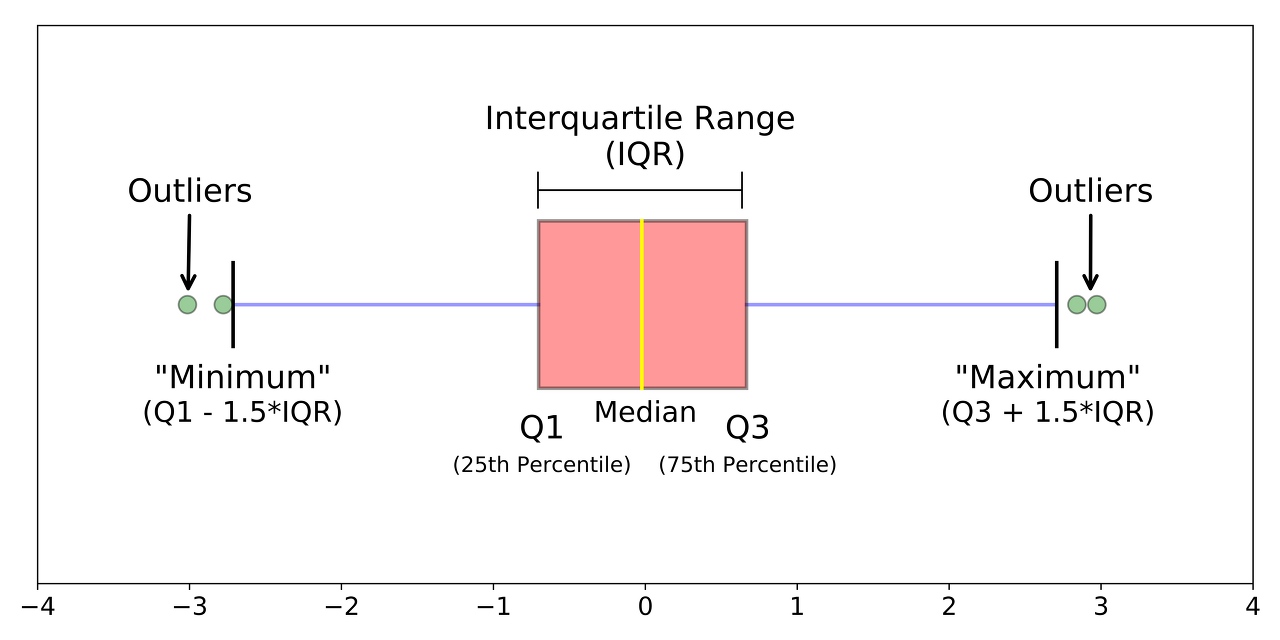
전체 데이터들을 오름차순으로 정렬하고, 정확히 4등분(25%, 50%, 75%, 100%)으로 나눕니다.

여기서 75% 지점의 값과 25% 지점의 값의 차이를 IQR이라고 합니다!! 

In [ ]:
# 아웃라이어가 포함된 임의의 데이터 만들기
np.random.seed(2020)
data = np.random.randn(100) # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5]))) # [8, 10, -3, 5] 이상치를 맨 뒤에 추가한다
data

In [ ]:
# 박스 플롯
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

- 박스 플롯에서 벗어난 점들이 이상치이다.

우리는 사분위범위수 IQR(Interquartile range)을 이용하여 이상치를 찾아낼 수 있습니다.

$$IQR=Q_3 - Q_1$$

즉, IQR은 제 3사분위수에서 제 1사분위 값을 뺀 값으로 데이터의 중간 50%의 범위라고 생각하시면 됩니다.

$Q_1 - 1.5 * IQR$보다 왼쪽에 있거나 $Q_3 + 1.5 * IQR$보다 오른쪽에 있는 경우 이상치라 판단합니다

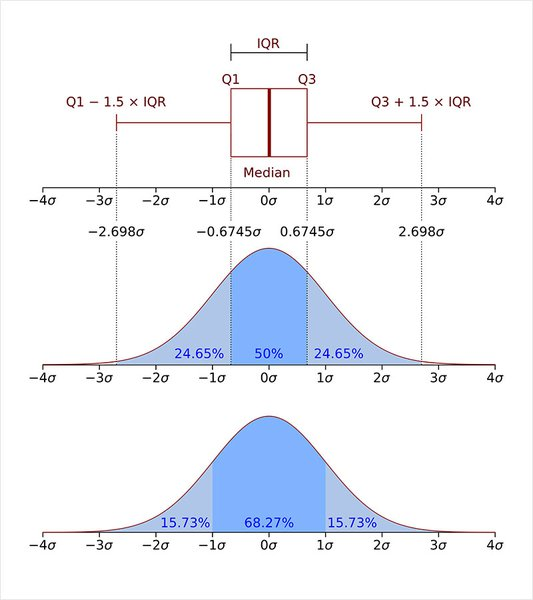

In [ ]:
# IQR을 구하기 위해 우선 제1사분위수와 제 3사분위수를 구합니다.
Q3, Q1 = np.percentile(data, [75, 25])
IQR = Q3 - Q1
IQR

In [ ]:
# IQR과 제 1사분위수, 제 3사분위수를 이용하여 이상치를 확인
data[(Q1 - 1.5 * IQR > data) | (Q3 + 1.5 * IQR < data)]

- [Three ways to detect outliers](http://colingorrie.github.io/outlier-detection.html)

z-score 방법이 가지는 뚜렷한 단점 2가지
1. Robust하지 못하다 - 왜나하면 평균과 표준편차 자체가 이상치의 존재에 크게 영향을 받기 때문이다. 
2. 작은 데이터셋의 경우 z-score의 방법으로 이상치를 알아내기 어렵다. 특히 item이 12개 이하인 데이터셋에서는 불가능하다.

In [ ]:
# 무역수지에서 이상치 찾기
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1 - 1.5 * iqr) | (df[col] > q3 + 1.5 * iqr)]

outlier2(trade, '무역수지')

In [ ]:
# z-score method
def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [ ]:
# modified z-score method
def outliers_modified_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

In [ ]:
# iqr method
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

## 9-5. 정규화(Normalization)

trade 데이터를 보면 수입건수, 수출건수와 수입금액, 수출금액, 무역수지는 단위가 다르다는 것을 알 수 있습니다.

이처럼 컬럼마다 스케일이 크게 차이가 나는 데이터를 입력하면 머신러닝 모델 학습에 문제가 발생할 수 있습니다.

예를 들어 데이터의 범위가 0에서 1 사이인 컬럼 A과 1000에서 10000 사이인 컬럼 B가 있다고 생각해봅시다. 이런 데이터를 클러스터링 한다고 가정해봅시다. 데이터 간의 거리를 잴 때, 범위가 큰 컬럼 B의 값에만 영향을 크게 받을 것입니다.

그래서 일반적으로 컬럼간에 범위가 크게 다를 경우 전처리 과정에서 데이터를 정규화합니다.

---


정규화를 하는 방법은 다양하지만, 가장 잘 알려진 표준화(Standardization)와 Min-Max Scaling을 알아보도록 하겠습니다.
- **Standardization**: 데이터의 평균은 0, 분산은 1로 변환

$$ {X - \mu} \over {\sigma}$$

- **Min-Max Scaling**:  데이터의 최솟값은 0, 최댓값은 1로 변환

$$ {X - X_{min}} \over {X_{max} - X_{min}}$$

In [ ]:
# 정규분포를 따라 랜덤하게 데이터 x를 생성합니다. 
np.random.seed(2020)
x = pd.DataFrame({'A': np.random.randn(100)*4+4,
                 'B': np.random.randn(100)-1})
x

In [ ]:
# 데이터 x를 Standardization 기법으로 정규화한다
x_standardization = (x - x.mean()) / x.std()
x_standardization

In [ ]:
# 데이터 x를 min-max scaling 기법으로 정규화
x_min_max = (x - x.min()) / (x.max() - x.min())
x_min_max

In [ ]:
# 데이터를 Standardization 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다. 
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

In [ ]:
# 동일한 데이터를 min-max scaling 기법으로 정규화를 했을 때 분포가 어떻게 바뀌는지 보여줍니다.
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

### Standardization


In [ ]:
# trade 데이터를 Standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'] # 정규화할 수치형 컬럼들

trade_standardization = (trade[cols] - trade[cols].mean()) / trade[cols].std()
trade_standardization.head()

In [ ]:
trade_standardization.describe()

- Standardization 방법으로 정규화한 데이터를 보면 각 컬럼의 평균이 거의 0에 가가ㅃ고, 표준편차는 1에 가까운 것을 확인할 수 있다.

## Min-Max Scaling

데이터에서 최솟값을 빼주고, '최댓값-최솟값'으로 나눠줍니다.



In [ ]:
# trade 데이터를 min-max scaling 기법으로 정규화합니다. 
trade[cols] = (trade[cols] - trade[cols].min()) / (trade[cols].max() - trade[cols].min())
trade.head()

In [ ]:
trade.describe()

- Min-Max Scaling 방법으로 정규화시킨 후, 각 컬럼의 최솟값(min)은 0이고, 최댓값(max)은 1임을 확인할 수 있다.

**주의!!**
train 데이터와 test 데이터가 나눠져 있는 경우 **train 데이터를 정규화시켰던 기준 그대로 test 데이터도 정규화** 시켜줘야 한다.

In [ ]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])
print("👽 It's okay, no biggie.")

In [ ]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min)/(train_max - train_min)
test_min_max =  (test - train_min)/(train_max - train_min)    # test를 min-max scaling할 때도 train 정규화 기준으로 수행
print("💫 It's okay, no biggie...")

In [ ]:
train_min_max

In [ ]:
test_min_max

scikit-learn의 `StandardScaler`, `MinMaxScaler`를 사용하는 방법도 있습니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]

scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(train)

In [ ]:
scaler.transform(test)

- [Normalizing inputs - Andrew Ng](https://www.youtube.com/watch?v=FDCfw-YqWTE&feature=youtu.be&ab_channel=DeepLearningAI)

- **로그 변환** 등의 기법도 정규화하 함께 사용하면 도움이 된다.

## 9-6. 원-핫 인코딩(One-Hot Encoding)

원-핫 인코딩이란 무엇인가요?

원-핫 인코딩이란 카테고리별 이진 특성을 만들어 해당하는 특성만 1, 나머지는 0으로 만드는 방법입니다. 그럼, pandas로 국가명 컬럼을 원-핫 인코딩을 해보겠습니다.

pandas에서 `get_dummies` 함수를 통해 손쉽게 원-핫 인코딩을 할 수 있습니다.

In [ ]:
# trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

In [ ]:
# pd.concat 함수로 데이터프레임 trade와 country를 합쳐줍니다.
trade = pd.concat([trade, country], axis=1)
trade.head()

In [ ]:
# 이제는 필요 없어진 국가명 컬럼을 삭제해주고 나면 trade는 우리가 원하는 데이터프레임이 됩니다.
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

## 9-7. 구간화(Binning)

In [ ]:
# salry에 소득 데이터
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])

이 데이터를 구간별로 나누고자 합니다. 이러한 기법을 구간화(`Data binning` 혹은 `bucketing`)이라고 부릅니다.

아래 히스토그램과 같이 연속적인 데이터를 구간을 나눠 분석할 때 사용하는 방법입니다.

In [ ]:
salary.hist()

pandas의 `cut` 과 `qcut`을 이용해 수치형 데이터를 범주형 데이터로 변형시키도록 하겠습니다.

In [ ]:
# cut을 사용하기 위해 우선 구간을 정해줍니다.
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [ ]:
# cut 함수에 데이터와 구간을 입력하면 데이터를 구간별로 나눠줍니다.
ctg = pd.cut(salary, bins=bins)
ctg

In [ ]:
print('salary[0]:', salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

- salary[0]는 4300으로 4000에서 6000 사이에 포함되었다는 것을 확인할 수 있습니다.

In [ ]:
# 구간별로 값이 몇 개가 속해 있는지 value_counts()로 확인해보겠습니다.
ctg.value_counts().sort_index()

In [ ]:
# bins 옵션에 정수를 입력하면 데이터의 최솟값에서 최댓값을 균등하게 bins 개수만큼 나눠줍니다.
ctd = pd.cut(salary, bins=6)
ctg

In [ ]:
ctg.value_counts().sort_index()

`qcut`은 구간을 일정하게 나누는 것이 아니라 데이터의 분포를 비슷한 크기의 그룹으로 나눠줍니다.

In [ ]:
ctg = pd.qcut(salary, q=5)
ctg

In [ ]:
print(ctg.value_counts().sort_index())
print(".\n.\n🛸 Well done!")

## 마무리와 복습 과제
- 결측치(Missing Data)
- 중복된 데이터
- 이상치(Outlier)
- 정규화(Normalization)
- 원-핫 인코딩(One-Hot Encoding)
- 구간화(Binning)


복습 과제
- [Kaggle Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)